In [1]:
#!jt -t monokai -T -N -kl
#!jt -r

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 12)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [4]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)[['Date', 'Country', 'Deaths']]

In [5]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
Deaths = pd.DataFrame()
Deaths['Date'] = country_df.Date.unique()
Deaths['Date'] = pd.to_datetime(Deaths.Date)
#Deaths = Deaths.set_index('Date')

In [7]:
countries = country_df['Country'].unique()
for c in countries:
    cun = country_df[country_df.Country == c].Deaths
    Deaths[c] = list(cun)
Deaths = Deaths.set_index('Date')

In [8]:
Important_countries = ['India', 'World', #'World without China',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'United Kingdom', 'France',
                      'Korea, South', 'Iran']#[::-1]
colors = {'India': 'Blue', 'World': 'Blue', 'World without US': 'Green', 'US': 'Black', 'China': 'red', 'Spain': 'yellow',
         'Italy': 'grey', 'Iran': 'brown', 'Ireland': 'violet', 'United Kingdom': 'Purple', 'Korea, South': 'Black',
         'France': 'orange', 'Germany': 'Green'}
def plotter(DF, name, log = True):
    plt.figure(figsize = (14, 7))
    if log:
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    if len(DF.columns)>len(Important_countries):
        columns = Important_countries
    else:
        columns = DF.columns
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend()
    plt.show()

In [9]:
def plot2(DF, DF2, name1, name2 = 'Deaths', log = True):
    plt.figure(figsize = (14, 7))
    if log:
        plt.xscale('log')
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    for col in Important_countries:
        plt.plot(DF[col],
                 DF2[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend()
    plt.show()

In [10]:
Deaths.tail(14)[Important_countries]

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-12,331,114100,22029,3022,19899,17209,3343,10629,14412,214,4474
2020-04-13,358,119491,23538,3194,20465,17756,3345,11347,14986,217,4585
2020-04-14,393,125995,25843,3294,21067,18056,3345,12129,15748,222,4683
2020-04-15,405,134189,28338,3804,21645,18708,3346,12894,17188,225,4777
2020-04-16,448,143814,32930,4052,22170,19315,3346,13759,17941,229,4869
2020-04-17,486,153835,36787,4352,22745,20002,4636,14607,18703,230,4958
2020-04-18,521,159509,38664,4459,23227,20043,4636,15498,19345,232,5031
2020-04-19,559,165043,40661,4586,23660,20453,4636,16095,19744,234,5118
2020-04-20,592,169985,42094,4862,24114,20852,4636,16550,20292,236,5209


c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


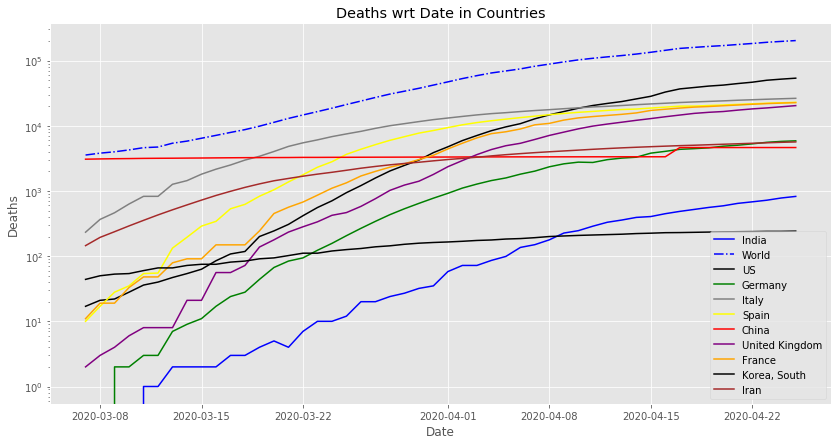

In [11]:
plotter(Deaths[Important_countries].tail(50), 'Deaths')

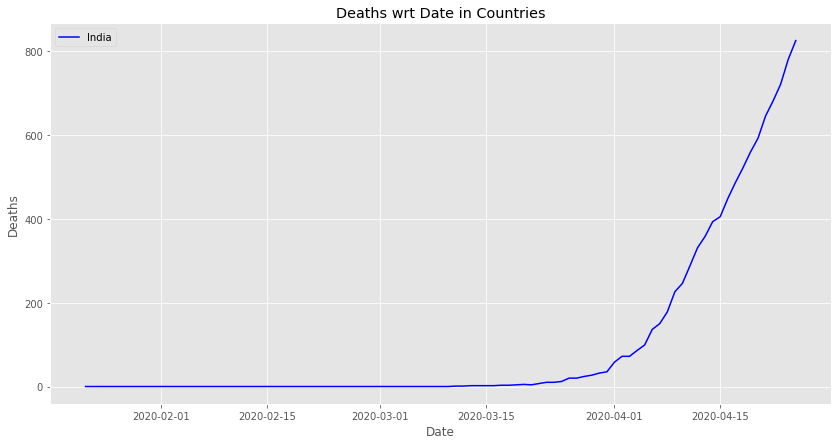

In [12]:
plotter(Deaths[['India']], 'Deaths', False)
#Deaths[['India']].tail(50)

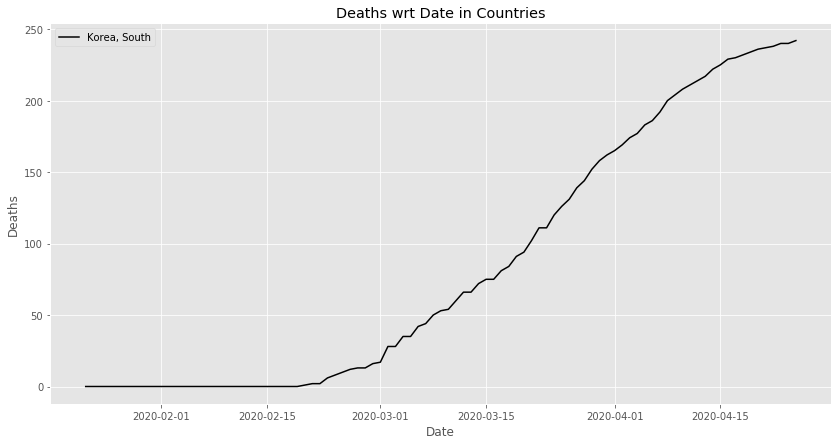

In [13]:
plotter(Deaths[['Korea, South']], 'Deaths', False)

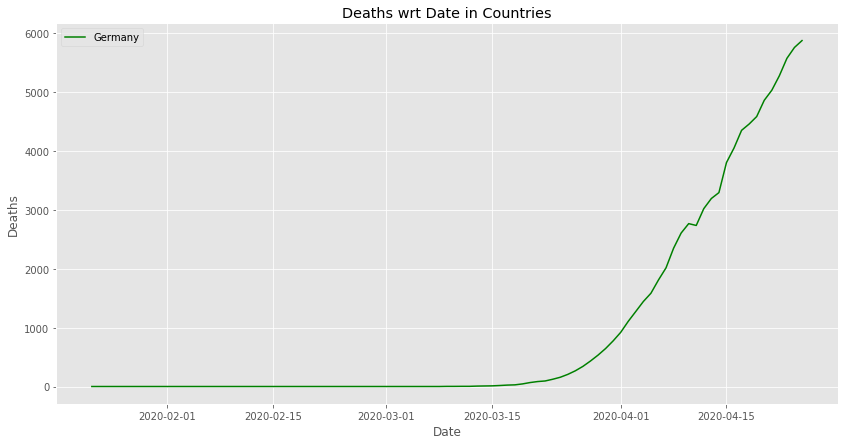

In [14]:
plotter(Deaths[['Germany']], 'Deaths', False)

In [15]:
Removed = np.round(Deaths/0.02).astype('int')
Removed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-12,16550,5705000,1101450,151100,994950,860450,167150,531450,720600,10700,223700
2020-04-13,17900,5974550,1176900,159700,1023250,887800,167250,567350,749300,10850,229250
2020-04-14,19650,6299750,1292150,164700,1053350,902800,167250,606450,787400,11100,234150
2020-04-15,20250,6709450,1416900,190200,1082250,935400,167300,644700,859400,11250,238850
2020-04-16,22400,7190700,1646500,202600,1108500,965750,167300,687950,897050,11450,243450
2020-04-17,24300,7691750,1839350,217600,1137250,1000100,231800,730350,935150,11500,247900
2020-04-18,26050,7975450,1933200,222950,1161350,1002150,231800,774900,967250,11600,251550
2020-04-19,27950,8252150,2033050,229300,1183000,1022650,231800,804750,987200,11700,255900
2020-04-20,29600,8499250,2104700,243100,1205700,1042600,231800,827500,1014600,11800,260450


In [16]:
Biweekly_Deaths = Deaths - Deaths.shift(14)
Biweekly_Deaths = Biweekly_Deaths.fillna(0).astype('int')
Biweekly_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-12,304,80175,19562,2489,9120,10406,39,9398,11801,62,1834
2020-04-13,326,81909,20560,2549,8874,10040,37,9936,11956,59,1828
2020-04-14,358,83887,21969,2519,8639,9592,36,10336,12216,60,1785
2020-04-15,347,87006,23578,2884,8490,9321,30,10537,12774,60,1741
2020-04-16,376,90828,27001,2945,8255,8967,24,10833,12543,60,1709
2020-04-17,414,95045,29697,3077,8064,8804,1310,10996,12183,56,1664
2020-04-18,435,94902,30256,3015,7865,8096,1306,11178,11771,55,1579
2020-04-19,460,95669,31042,3002,7773,7812,1303,11152,11651,51,1515
2020-04-20,456,95420,31311,3052,7591,7511,1301,11165,11366,50,1470


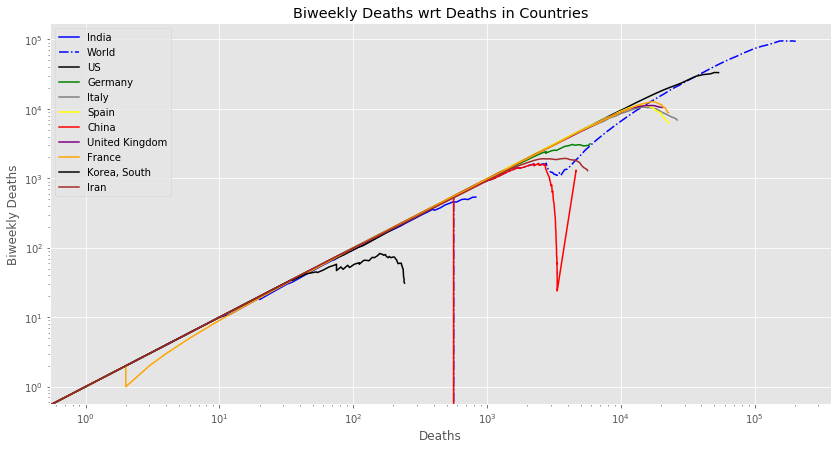

In [17]:
plot2(Deaths, Biweekly_Deaths, 'Biweekly Deaths')

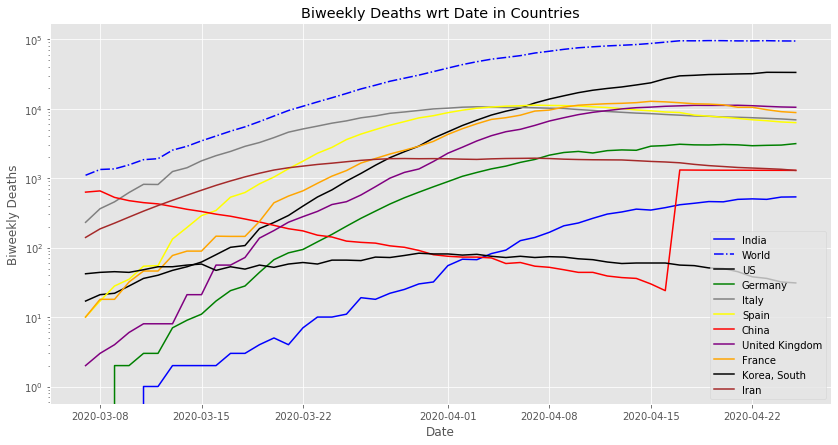

In [18]:
plotter(Biweekly_Deaths[Important_countries].tail(50), 'Biweekly Deaths', True)

In [19]:
# Biweekly increase in biweekly deaths
Increase_Biweekly = Biweekly_Deaths-Biweekly_Deaths.shift(14)
Increase_Biweekly = Increase_Biweekly.fillna(0).astype('int')
Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-12,279,52690,17158,1967,150,3892,-62,8188,9281,-15,-82
2020-04-13,296,51453,17667,1921,-559,2666,-54,8581,9075,-24,-76
2020-04-14,326,49684,18203,1768,-1286,1661,-43,8599,8833,-21,-125
2020-04-15,292,48556,18936,1992,-1687,557,-45,8252,8509,-21,-160
2020-04-16,308,47709,21272,1882,-2255,-551,-49,8045,7389,-18,-167
2020-04-17,347,47554,22851,1869,-2585,-1351,1237,7563,6114,-24,-197
2020-04-18,353,43268,22155,1655,-2672,-2476,1235,7092,4760,-20,-317
2020-04-19,368,40946,21840,1512,-2638,-3057,1244,6491,4234,-21,-403
2020-04-20,330,37360,21085,1365,-2855,-3519,1240,6116,3302,-25,-457


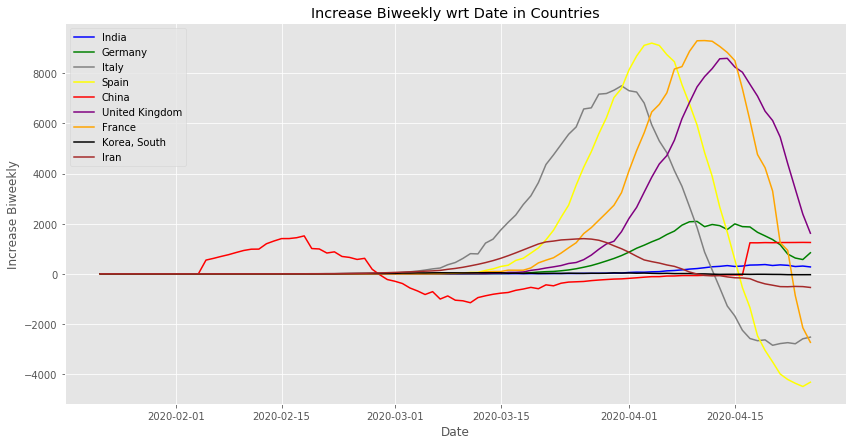

In [20]:
plotter(Increase_Biweekly[[c for c in Important_countries if c not in ['World', 'US']]], 'Increase Biweekly', False)

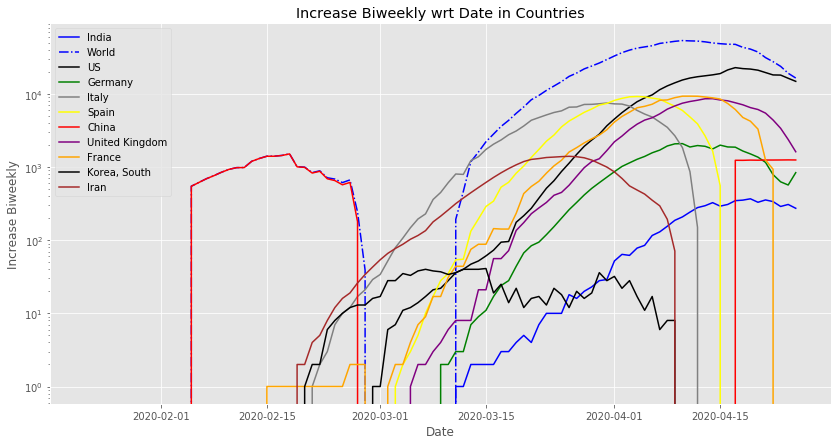

In [21]:
plotter(Increase_Biweekly, 'Increase Biweekly', True)

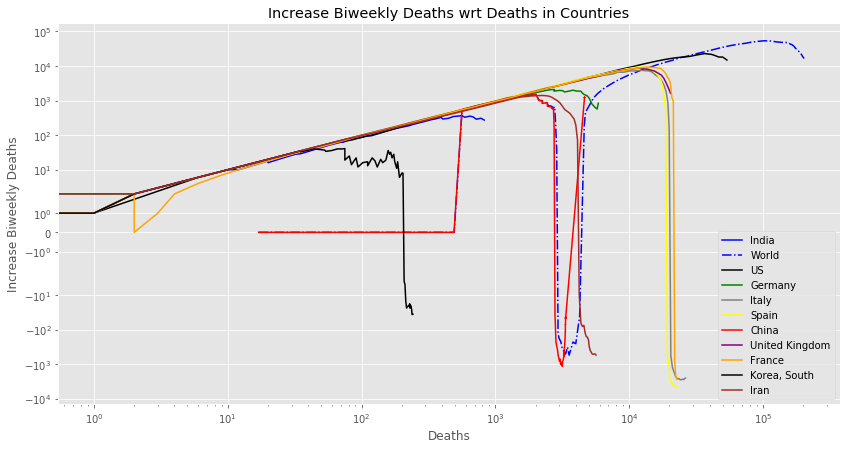

In [22]:
plot2(Deaths, Increase_Biweekly, 'Increase Biweekly Deaths', log = 'symlog')

In [23]:
# Biweekly increase in increase of Biweekly Deaths
Growth_Increase_Biweekly = Increase_Biweekly-Increase_Biweekly.shift(14)
Growth_Increase_Biweekly = Growth_Increase_Biweekly.fillna(0).astype('int')
Growth_Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-12,256,28649,14816,1456,-7045,-2333,168,6999,6850,-34,-1328
2020-04-13,268,25038,14853,1310,-7886,-4366,158,7282,6340,-60,-1193
2020-04-14,297,20226,14538,1041,-8787,-5738,161,6918,5595,-49,-1124
2020-04-15,240,15585,14401,1128,-8993,-7586,138,6039,4389,-53,-1018
2020-04-16,244,11109,15731,863,-9508,-9242,112,5394,2473,-40,-866
2020-04-17,285,7902,16235,728,-9399,-10468,1373,4306,487,-52,-749
2020-04-18,275,1049,14344,379,-8617,-11683,1351,3238,-1699,-37,-802
2020-04-19,283,-2928,13034,116,-7939,-12171,1359,2109,-2526,-32,-830
2020-04-20,214,-8183,11394,-201,-7687,-12266,1330,1399,-3919,-42,-809


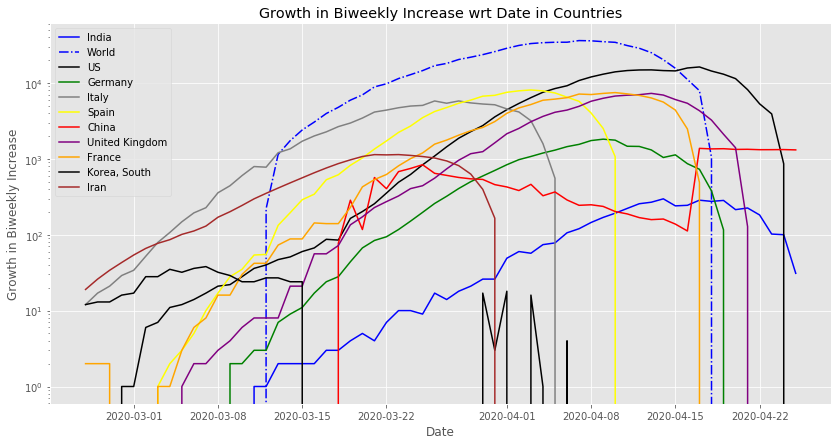

In [24]:
plotter(Growth_Increase_Biweekly.tail(60), 'Growth in Biweekly Increase', True)

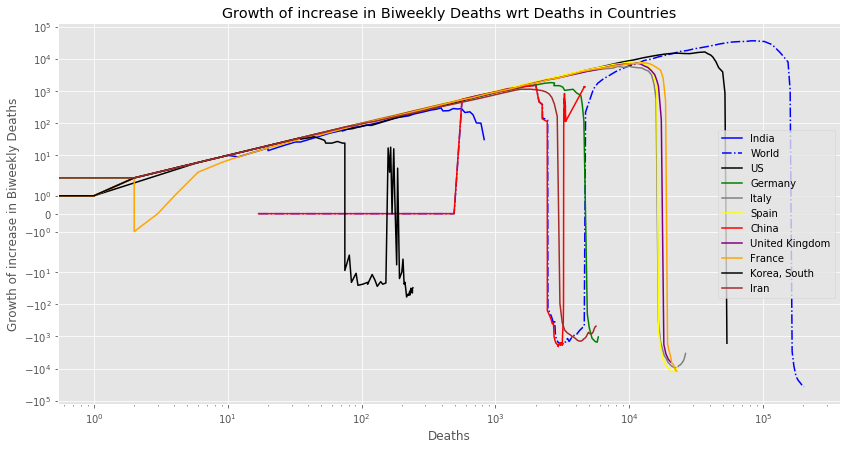

In [25]:
plot2(Deaths, Growth_Increase_Biweekly, 'Growth of increase in Biweekly Deaths', log = 'symlog')

In [26]:
Slope = np.round(Increase_Biweekly/Biweekly_Deaths, 4)
Slope[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-12,0.9178,0.6572,0.8771,0.7903,0.0164,0.3740,-1.5897,0.8712,0.7865,-0.2419,-0.0447
2020-04-13,0.9080,0.6282,0.8593,0.7536,-0.0630,0.2655,-1.4595,0.8636,0.7590,-0.4068,-0.0416
2020-04-14,0.9106,0.5923,0.8286,0.7019,-0.1489,0.1732,-1.1944,0.8319,0.7231,-0.3500,-0.0700
2020-04-15,0.8415,0.5581,0.8031,0.6907,-0.1987,0.0598,-1.5000,0.7831,0.6661,-0.3500,-0.0919
2020-04-16,0.8191,0.5253,0.7878,0.6390,-0.2732,-0.0614,-2.0417,0.7426,0.5891,-0.3000,-0.0977
2020-04-17,0.8382,0.5003,0.7695,0.6074,-0.3206,-0.1535,0.9443,0.6878,0.5018,-0.4286,-0.1184
2020-04-18,0.8115,0.4559,0.7323,0.5489,-0.3397,-0.3058,0.9456,0.6345,0.4044,-0.3636,-0.2008
2020-04-19,0.8000,0.4280,0.7036,0.5037,-0.3394,-0.3913,0.9547,0.5820,0.3634,-0.4118,-0.2660
2020-04-20,0.7237,0.3915,0.6734,0.4472,-0.3761,-0.4685,0.9531,0.5478,0.2905,-0.5000,-0.3109


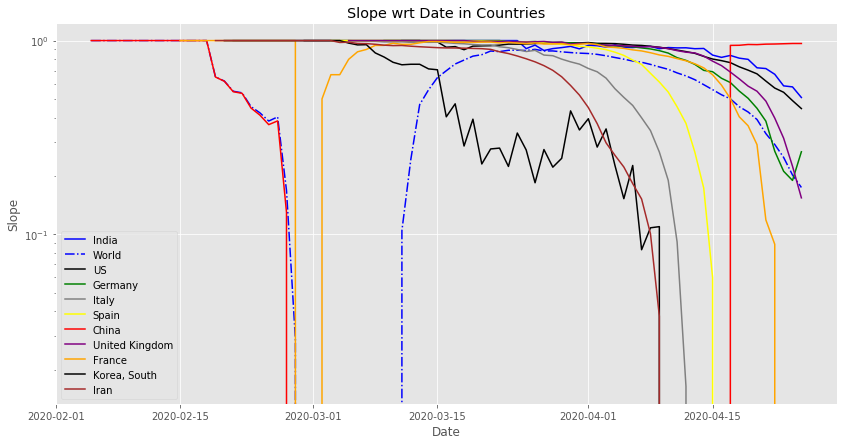

In [27]:
plotter(Slope, 'Slope', True)

In [28]:
Biweekly_Growth = np.round(Deaths/Deaths.shift(14), 4)
Biweekly_Growth[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-12,12.2593,3.3633,8.9295,5.6698,1.8461,2.5296,1.0118,8.6344,5.5197,1.4079,1.6947
2020-04-13,11.1875,3.1795,7.9040,4.9519,1.7656,2.3012,1.0112,8.0418,4.9459,1.3734,1.6630
2020-04-14,11.2286,2.9922,6.6709,4.2503,1.6951,2.1333,1.0109,6.7646,4.4587,1.3704,1.6159
2020-04-15,6.9828,2.8440,5.9534,4.1348,1.6454,1.9930,1.0090,5.4705,3.8940,1.3636,1.5735
2020-04-16,6.2222,2.7142,5.5541,3.6603,1.5932,1.8665,1.0072,4.7023,3.3236,1.3550,1.5408
2020-04-17,6.7500,2.6167,5.1886,3.4133,1.5493,1.7862,1.3939,4.0451,2.8686,1.3218,1.5052
2020-04-18,6.0581,2.4689,4.5985,3.0880,1.5120,1.6777,1.3922,3.5875,2.5541,1.3107,1.4574
2020-04-19,5.6465,2.3790,4.2272,2.8952,1.4893,1.6180,1.3909,3.2561,2.4396,1.2787,1.4205
2020-04-20,4.3529,2.2797,3.9037,2.6862,1.4594,1.5630,1.3901,3.0734,2.2734,1.2688,1.3932


In [29]:
Daily_Deaths = Deaths-Deaths.shift(1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-12,43,5589,1558,286,431,603,0,737,561,3,117
2020-04-13,27,5391,1509,172,566,547,2,718,574,3,111
2020-04-14,35,6504,2305,100,602,300,0,782,762,5,98
2020-04-15,12,8194,2495,510,578,652,1,765,1440,3,94
2020-04-16,43,9625,4592,248,525,607,0,865,753,4,92
2020-04-17,38,10021,3857,300,575,687,1290,848,762,1,89
2020-04-18,35,5674,1877,107,482,41,0,891,642,2,73
2020-04-19,38,5534,1997,127,433,410,0,597,399,2,87
2020-04-20,33,4942,1433,276,454,399,0,455,548,2,91


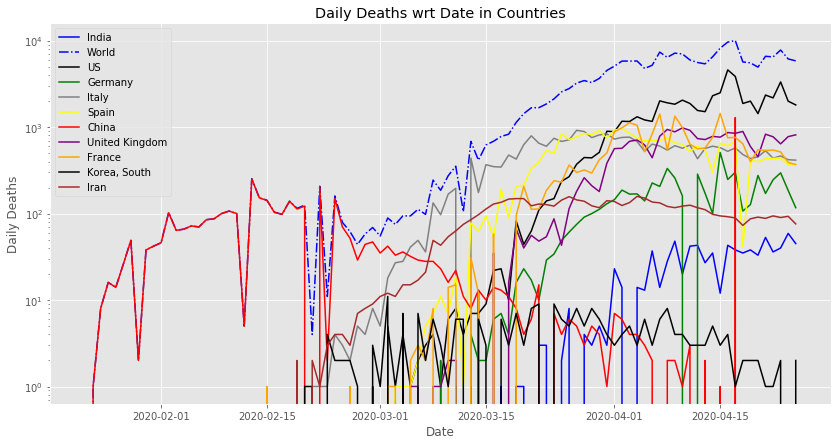

In [30]:
plotter(Daily_Deaths, 'Daily Deaths')

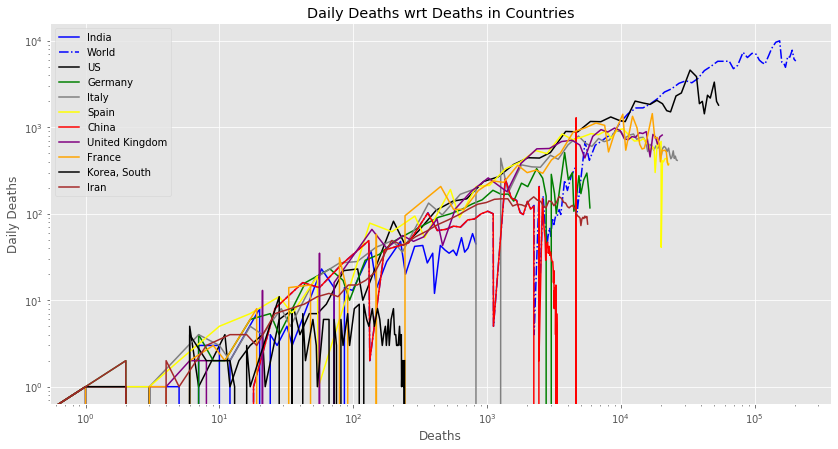

In [31]:
plot2(Deaths, Daily_Deaths, 'Daily Deaths')

In [32]:
Confirmed = np.round(Removed * Biweekly_Growth)#.astype('int')
#Confirmed = Confirmed.astype('int')
Confirmed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-12,202891.0,19187626.0,9835398.0,856707.0,1836777.0,2176594.0,169122.0,4588752.0,3977496.0,15065.0,379104.0
2020-04-13,200256.0,18996082.0,9302218.0,790818.0,1806650.0,2043005.0,169123.0,4562515.0,3705963.0,14901.0,381243.0
2020-04-14,220642.0,18850112.0,8619803.0,700024.0,1785534.0,1925943.0,169073.0,4102392.0,3510780.0,15211.0,378363.0
2020-04-15,141402.0,19081676.0,8435372.0,786439.0,1780734.0,1864252.0,168806.0,3526831.0,3346504.0,15340.0,375830.0
2020-04-16,139377.0,19516998.0,9144826.0,741577.0,1766062.0,1802572.0,168505.0,3234947.0,2981435.0,15515.0,375108.0
2020-04-17,164025.0,20127002.0,9543651.0,742734.0,1761941.0,1786379.0,323106.0,2954339.0,2682571.0,15201.0,373139.0
2020-04-18,157814.0,19690589.0,8889820.0,688470.0,1755961.0,1681307.0,322712.0,2779954.0,2470453.0,15204.0,366609.0
2020-04-19,157820.0,19631865.0,8594109.0,663869.0,1761842.0,1654648.0,322411.0,2620346.0,2408373.0,14961.0,363506.0
2020-04-20,128846.0,19375740.0,8216117.0,653015.0,1759599.0,1629584.0,322225.0,2543238.0,2306592.0,14972.0,362859.0


In [33]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [34]:
D = {
    'Deaths':Deaths,
    'Biweekly_Deaths':Biweekly_Deaths,
    'GBI':Growth_Increase_Biweekly,
    'Slope':Slope,
    'Removed':Removed,
    'Biweekly_Growth':Biweekly_Growth,
    'Daily_Deaths':Daily_Deaths,
    'Confirmed':Confirmed
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]

In [35]:
LastDay_DF = LastDay_DF[LastDay_DF.Deaths>=700]
LastDay_DF

,Deaths,Biweekly_Deaths,GBI,Slope,Removed,Biweekly_Growth,Daily_Deaths,Confirmed
Country,,,,,,,,
Belgium,6917,3571,-2066,0.1619,345850,2.0672,238,714941.0
Brazil,4057,2933,1018,0.6546,202850,3.6094,353,732167.0
Canada,2547,1893,767,0.6867,127350,3.8945,163,495965.0
China,4636,1293,1311,0.9660,231800,1.3868,0,321460.0
France,22648,8797,-12045,-0.3111,1132400,1.6351,369,1851587.0
Germany,5877,3141,-1041,0.2668,293850,2.1480,117,631190.0
India,825,537,31,0.5084,41250,2.8646,45,118165.0
Indonesia,720,393,40,0.4275,36000,2.2018,31,79265.0
Iran,5650,1293,-481,-0.4230,282500,1.2968,76,366346.0
